In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import RecurrsiveFeatureSelector

In [2]:
iris = pd.read_csv('iris.csv')
iris = iris.iloc[:, 1:]
iris.replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}, inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X = iris.drop('Species', axis=1)
y = iris['Species']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [5]:
import xgboost as xgb
clf = xgb.XGBClassifier(use_label_encoder=False, verbosity=0)

In [6]:
import numpy as np
from sklearn.model_selection import cross_val_score

Trial Started:
------------------------------------------------------------Trial 1------------------------------------------------------------
1/4: ['SepalLengthCm']
      Score: 0.62, Standard Deviation: 0.1208
 
2/4: ['SepalWidthCm']
      Score: 0.48, Standard Deviation: 0.103
 
3/4: ['PetalLengthCm']
      Score: 0.91, Standard Deviation: 0.049
 
4/4: ['PetalWidthCm']
      Score: 0.93, Standard Deviation: 0.0678
 
Best Combination of Trial 1: 
     PetalWidthCm
 
Best Score of Trial 1: 
     0.93
 
Time Spent for Trial 1: 1.17(s)
 
------------------------------------------------------------Trial 2------------------------------------------------------------
1/3: ['PetalWidthCm', 'SepalLengthCm']
      Score: 0.92, Standard Deviation: 0.0678
 
2/3: ['PetalWidthCm', 'SepalWidthCm']
      Score: 0.92, Standard Deviation: 0.0812
 
3/3: ['PetalWidthCm', 'PetalLengthCm']
      Score: 0.93, Standard Deviation: 0.0678
 
Best Combination of Trial 2: 
     ['PetalWidthCm', 'PetalLengthCm']


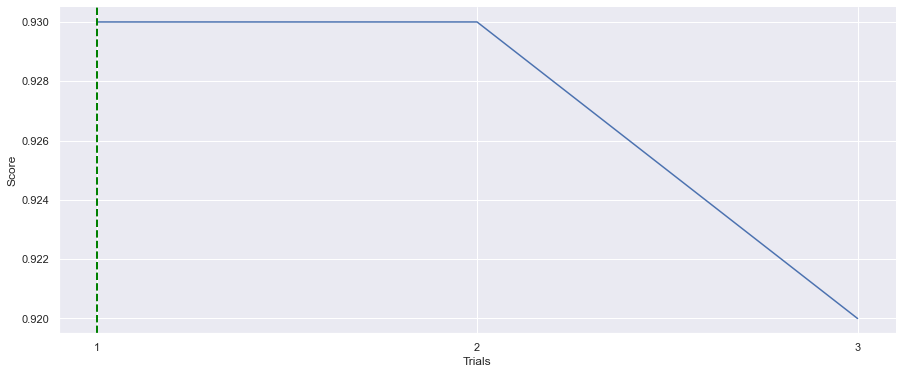

In [13]:
rfs = RecurrsiveFeatureSelector.RecurrsiveFeatureSelector()
rfs.trial(model=clf, X=X_train, y=y_train, cv=5, task='classification', scoring='accuracy', max_round=None, chances_to_fail=None, jump_start=None)

In [8]:
rfs.best_com

{'Trial 1': ['PetalWidthCm'],
 'Trial 2': ['PetalWidthCm', 'PetalLengthCm'],
 'Trial 3': ['PetalWidthCm', 'PetalLengthCm', 'SepalLengthCm'],
 'Trial 4': ['PetalWidthCm', 'PetalLengthCm', 'SepalLengthCm', 'SepalWidthCm']}

In [9]:
rfs.best_score

{'Trial 1': 0.93, 'Trial 2': 0.93, 'Trial 3': 0.92, 'Trial 4': 0.91}

In [10]:
rfs.trial_best

'PetalWidthCm'

In [11]:
rfs.trials_time_spend

{'Trial 1': 1.21, 'Trial 2': 0.71, 'Trial 3': 0.45, 'Trial 4': 0.23}

In [12]:
rfs.summary

,best_com,best_score,trials_time_spend
Trial 1,[PetalWidthCm],0.93,1.21
Trial 2,"[PetalWidthCm, PetalLengthCm]",0.93,0.71
Trial 3,"[PetalWidthCm, PetalLengthCm, SepalLengthCm]",0.92,0.45
Trial 4,"[PetalWidthCm, PetalLengthCm, SepalLengthCm, S...",0.91,0.23


Trial Started:
------------------------------------------------------------Trial 1------------------------------------------------------------
1/4: ['SepalLengthCm']
      Score: 0.62, Standard Deviation: 0.1208
 
2/4: ['SepalWidthCm']
      Score: 0.48, Standard Deviation: 0.103
 
3/4: ['PetalLengthCm']
      Score: 0.91, Standard Deviation: 0.049
 
4/4: ['PetalWidthCm']
      Score: 0.93, Standard Deviation: 0.0678
 
Best Combination of Trial 1: 
     PetalWidthCm
 
Best Score of Trial 1: 
     0.93
 
Time Spent for Trial 1: 1.17(s)
 
------------------------------------------------------------Trial 2------------------------------------------------------------
1/3: ['PetalWidthCm', 'SepalLengthCm']
      Score: 0.92, Standard Deviation: 0.0678
 
2/3: ['PetalWidthCm', 'SepalWidthCm']
      Score: 0.92, Standard Deviation: 0.0812
 
3/3: ['PetalWidthCm', 'PetalLengthCm']
      Score: 0.93, Standard Deviation: 0.0678
 
Best Combination of Trial 2: 
     ['PetalWidthCm', 'PetalLengthCm']


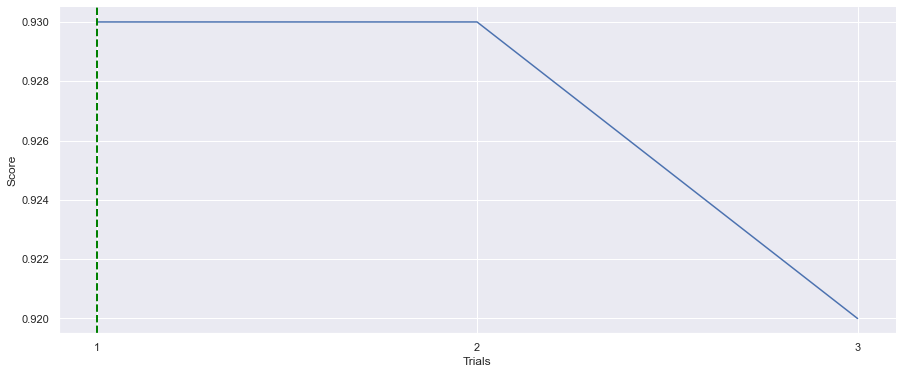

In [15]:
# limitng to only 3 rounds of search
rfs = RecurrsiveFeatureSelector.RecurrsiveFeatureSelector()
rfs.trial(model=clf, X=X_train, y=y_train, cv=5, task='classification', scoring='accuracy', max_round=3, chances_to_fail=None, jump_start=None)

Trial Started:
------------------------------------------------------------Trial 1------------------------------------------------------------
1/4: ['SepalLengthCm']
      Score: 0.62, Standard Deviation: 0.1208
 
2/4: ['SepalWidthCm']
      Score: 0.48, Standard Deviation: 0.103
 
3/4: ['PetalLengthCm']
      Score: 0.91, Standard Deviation: 0.049
 
4/4: ['PetalWidthCm']
      Score: 0.93, Standard Deviation: 0.0678
 
Best Combination of Trial 1: 
     PetalWidthCm
 
Best Score of Trial 1: 
     0.93
 
Time Spent for Trial 1: 1.18(s)
 
------------------------------------------------------------Trial 2------------------------------------------------------------
1/3: ['PetalWidthCm', 'SepalLengthCm']
      Score: 0.92, Standard Deviation: 0.0678
 
2/3: ['PetalWidthCm', 'SepalWidthCm']
      Score: 0.92, Standard Deviation: 0.0812
 
3/3: ['PetalWidthCm', 'PetalLengthCm']
      Score: 0.93, Standard Deviation: 0.0678
 
Best Combination of Trial 2: 
     ['PetalWidthCm', 'PetalLengthCm']


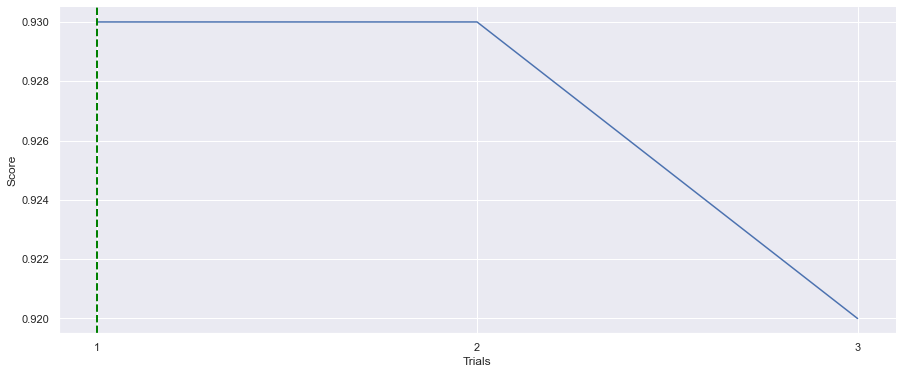

In [17]:
# cannot fail to improve score more than 1 times
rfs = RecurrsiveFeatureSelector.RecurrsiveFeatureSelector()
rfs.trial(model=clf, X=X_train, y=y_train, cv=5, task='classification', scoring='accuracy', max_round=None, chances_to_fail=1, jump_start=None)

Trial Started:
------------------------------------------------------------Trial 1------------------------------------------------------------
1/2: ['PetalWidthCm', 'PetalLengthCm', 'SepalLengthCm']
      Score: 0.92, Standard Deviation: 0.06
 
2/2: ['PetalWidthCm', 'PetalLengthCm', 'SepalWidthCm']
      Score: 0.91, Standard Deviation: 0.0583
 
Best Combination of Trial 1: 
     ['PetalWidthCm', 'PetalLengthCm', 'SepalLengthCm']
 
Best Score of Trial 1: 
     0.92
 
Time Spent for Trial 1: 0.45(s)
 
------------------------------------------------------------Trial 2------------------------------------------------------------
1/1: ['PetalWidthCm', 'PetalLengthCm', 'SepalLengthCm', 'SepalWidthCm']
      Score: 0.91, Standard Deviation: 0.0583
 
Best Combination of Trial 2: 
     ['PetalWidthCm', 'PetalLengthCm', 'SepalLengthCm', 'SepalWidthCm']
 
Best Score of Trial 2: 
     0.91
 
Time Spent for Trial 2: 0.23(s)
 
Chances to Fail reached. 
Trial stops.
---------------------------------

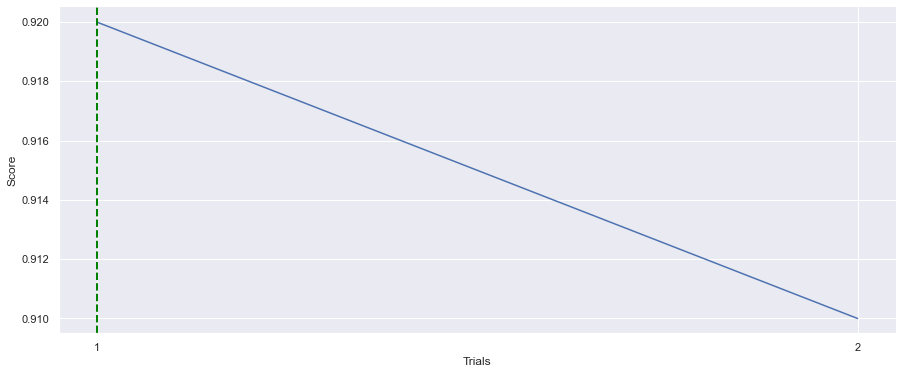

In [18]:
# assume we know ['PetalWidthCm', 'PetalLengthCm'] must be part of the best subset of features
# or we just want to start with ['PetalWidthCm', 'PetalLengthCm']
rfs = RecurrsiveFeatureSelector.RecurrsiveFeatureSelector()
rfs.trial(model=clf, X=X_train, y=y_train, cv=5, task='classification', scoring='accuracy', max_round=None, chances_to_fail=None, jump_start=['PetalWidthCm', 'PetalLengthCm'])